In [246]:
import numpy as np
import pandas as pd
import mplsoccer as mpls
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from functools import reduce
df=pd.read_csv('pol_events_predicted.csv')

In [247]:

def draw_pitch(ax):
    # size of the pitch is 105, 68
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,68], color="black")
    plt.plot([0,105],[68,68], color="black")
    plt.plot([105,105],[68,0], color="black")
    plt.plot([105,0],[0,0], color="black")
    plt.plot([52.5,52.5],[0,68], color="black")

    #Left Penalty Area
    plt.plot([12.775,12.775],[49.13,18.87],color="black")
    plt.plot([0,12.775],[49.13,49.13],color="black")
    plt.plot([0,12.775],[18.87,18.87],color="black")

    #Right Penalty Area
    plt.plot([105,92.225],[49.13,49.13],color="black")
    plt.plot([92.225,92.225],[49.13,18.87],color="black")
    plt.plot([105, 92.225],[18.87,18.87],color="black")

    #Left 6-yard Box
    plt.plot([0,4.2875],[40.8,40.8],color="black")
    plt.plot([4.2875,4.2875],[40.8,27.2],color="black")
    plt.plot([0,4.2875],[27.2,27.2],color="black")

    #Right 6-yard Box
    plt.plot([105,100.7125],[40.8,40.8],color="black")
    plt.plot([100.7125,100.7125],[40.8,27.2],color="black")
    plt.plot([105,100.7125],[27.2,27.2],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((52.5,34),8.1,color="black",fill=False)
    centreSpot = plt.Circle((52.5,34),0.71,color="black")
    leftPenSpot = plt.Circle((8.4875,34),0.71,color="black")
    rightPenSpot = plt.Circle((96.5125,34),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((8.4875,34),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((96.5125,34),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)  

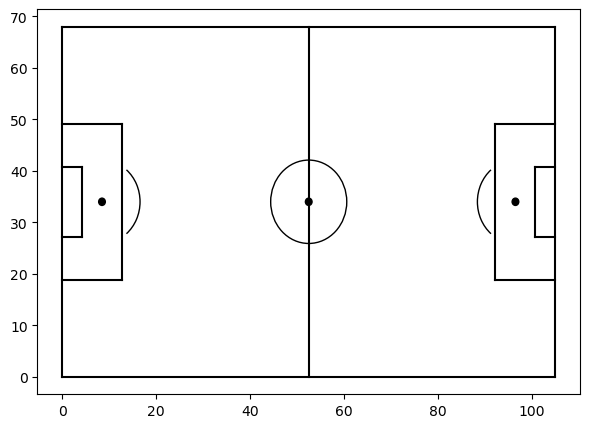

In [248]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.show()

In [249]:
df.describe(exclude='number').T

,count,unique,top,freq
matchPeriod,510021,2,1H,255665
SeasonName,510021,2,2020\/2021,298470
MatchName,510021,402,"Raków Częstochowa - Piast Gliwice, 1-0",2671
MatchDateUTC,510021,399,2021-05-16 15:30:00,9901
team_name,510021,19,Lech Poznań,35340
team_formation,510021,28,4-2-3-1,122600
opponentTeam_name,510021,19,Warta Poznań,33796
opponentTeam_formation,510021,28,4-2-3-1,113838
player_name,510021,672,B. Zech,3295
player_position,510021,28,LB,36702


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510021 entries, 0 to 510020
Data columns (total 95 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                510021 non-null  int64  
 1   matchId                           510021 non-null  int64  
 2   matchPeriod                       510021 non-null  object 
 3   minute                            510021 non-null  int64  
 4   second                            510021 non-null  int64  
 5   relatedEventId                    496718 non-null  float64
 6   SeasonID                          510021 non-null  int64  
 7   SeasonName                        510021 non-null  object 
 8   MatchName                         510021 non-null  object 
 9   MatchDateUTC                      510021 non-null  object 
 10  location_x                        510021 non-null  float64
 11  location_y                        510021 non-null  f

In [251]:
#new_df=df[['minute','player_name', 'pass_accurate','shot_isGoal', 
          #'shot_onTarget', 'shot_xg', 'goal', 'xT']].groupby('player_name')

In [252]:
#new_df.head()

In [253]:
#df_grouped=new_df.groupby(['player_name', 'matchId']).agg(
#min= ('minute', 'min'),
#max= ('minute', 'max'))

In [254]:
#df_grouped['minutes_played']= df_grouped['max']-df_grouped['min']

In [255]:
#df_grouped.reset_index(inplace=False)

In [256]:
#new_df=pd.merge(new_df, df_grouped[['matchId', 'minutes_played']], on= 'matchId')

In [257]:
#new_df.head()

In [258]:
df[["player_name","shot_xg","goal","shot_onTarget", "player_position"]].groupby(["player_name", "player_position"]).sum().sort_values("goal",ascending=False).head(15) #used as figure 1 in the document

,,shot_xg,goal,shot_onTarget
player_name,player_position,,,
T. Pekhart,CF,23.007798,24,42.0
M. Ishak,CF,26.206603,22,48.0
Erik Expósito,CF,11.021284,18,38.0
Jesús Jiménez,CF,14.882537,16,40.0
J. Świerczok,CF,11.795039,15,36.0
Flávio Paixão,CF,12.733185,12,22.0
Ivi López,LWF,7.596463,12,33.0
V. Gutkovskis,CF,12.874644,12,25.0
L. Zwoliński,CF,11.653192,11,28.0


In [259]:
zech_pass = df[(df["type_primary"] == "pass") & (df['player_name']=='B. Zech') & (df['matchId']== 5233219)] # get passing information of Ozil
pass_column = [i for i in df.columns if i.startswith("pass")]
zech_pass = zech_pass[["matchId", "matchPeriod", "location_x","location_y", "pass_carry_endLocation_x", "pass_carry_endLocation_y"]]
zech_pass.head()

,matchId,matchPeriod,location_x,location_y,pass_carry_endLocation_x,pass_carry_endLocation_y
6382,5233219,1H,29.40,46.24,36.75,63.92
6385,5233219,1H,24.15,61.20,10.50,36.04
6396,5233219,1H,35.70,32.64,31.50,17.00
6399,5233219,1H,36.75,36.72,45.15,46.92
6409,5233219,1H,39.90,18.36,47.25,38.76


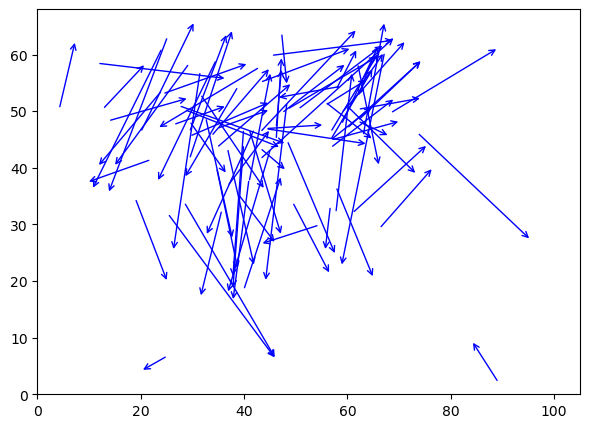

In [260]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlim([0,105])
ax.set_ylim([0,68])
for i in range(len(zech_pass)):
    
    ax.annotate("", xy = (zech_pass.iloc[i]['pass_carry_endLocation_x'], zech_pass.iloc[i]['pass_carry_endLocation_y']),
               xytext = (zech_pass.iloc[i]['location_x'], zech_pass.iloc[i]['location_y']),
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
plt.show()

In [261]:
zech_action = df[(df['player_name']=='G. Zhukov')][["id", "type_primary", "location_x", "location_y"]]
zech_action.head()

,id,type_primary,location_x,location_y
16208,1149228083,pass,35.70,28.56
16241,1149228141,pass,35.70,34.00
16259,1149228193,pass,60.90,42.16
16279,1149228256,touch,52.50,49.64
16280,1149228263,pass,64.05,55.76


C:\Users\user\AppData\Local\Temp\ipykernel_11008\38051608.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coord, y=y_coord, shade = "True", color = "red", n_levels = 10)


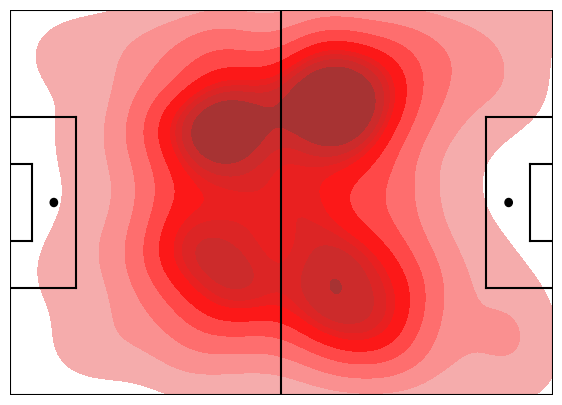

In [262]:
x_coord = [i for i in zech_action["location_x"]]
y_coord = [i for i in zech_action["location_y"]]
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')
sns.kdeplot(x=x_coord, y=y_coord, shade = "True", color = "red", n_levels = 10)
plt.ylim(0, 68) # need this, otherwise kde plot will go outside
plt.xlim(0, 105)
plt.show()

# Used for figure 6, 7, 8, 12, 13 as a template but personalised it to the mentioned players

In [263]:
def pass_map(data, player_name, matchId):
    pass_data = data[(data['type_primary'] == "pass") & (data['player_name'] == player_name) & (data['matchId'] == matchId)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(pass_data)):
        ax.annotate("", xy = (pass_data.iloc[i]['pass_carry_endLocation_x'], pass_data.iloc[i]['pass_carry_endLocation_y']),
               xytext = (pass_data.iloc[i]['location_x'], pass_data.iloc[i]['location_y']),
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
    
    plt.ylim(0, 68) # need this, otherwise kde plot will go outside
    plt.xlim(0, 105)
    plt.show()

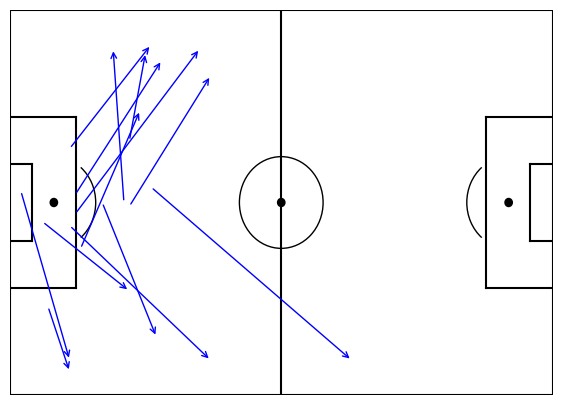

In [264]:
pass_map(df, 'D. Hładun', 5233074)

In [265]:
def pass_heat_map(data, player_name, matchId):
    pass_data = data[(data['type_primary'] == "pass") & (data['player_name'] == player_name) & (data['matchId'] == matchId)]
    action_data= data[(data['player_name'] == player_name)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(pass_data)):
        color = "green" if pass_data.iloc[i]['pass_accurate'] == 1 else "red"
        ax.annotate("", xy = (pass_data.iloc[i]['pass_carry_endLocation_x'], pass_data.iloc[i]['pass_carry_endLocation_y']),
               xytext = (pass_data.iloc[i]['location_x'], pass_data.iloc[i]['location_y']),
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    x_coord = [i for i in zech_action["location_x"]]
    y_coord = [i for i in zech_action["location_y"]]
    sns.kdeplot(x=x_coord, y=y_coord, shade = "True", color = "blue", n_levels = 10)
    plt.ylim(0, 68) # need this, otherwise kde plot will go outside
    plt.xlim(0, 105)
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11008\3333591612.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coord, y=y_coord, shade = "True", color = "blue", n_levels = 10)


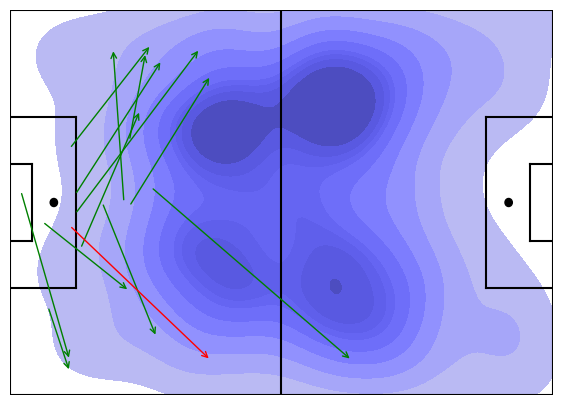

In [266]:
pass_heat_map(df, 'D. Hładun', 5233074)

In [267]:
Legia_shot = df[(df["type_primary"] == "shot") & (df['team_name']=='Legia Warszawa') & (df['matchId']== 5233074)]
shot_column = [i for i in df.columns if i.startswith("shot")]
Legia_shot = Legia_shot[["matchId", "matchPeriod", "possession_startLocation_x","possession_startLocation_y", "possession_endLocation_x", "possession_endLocation_y"]]
Legia_shot.head()

,matchId,matchPeriod,possession_startLocation_x,possession_startLocation_y,possession_endLocation_x,possession_endLocation_y
191,5233074,1H,69.30,68.00,81.90,38.76
269,5233074,1H,68.25,0.00,77.70,32.64
301,5233074,1H,63.00,68.00,91.35,22.44
353,5233074,1H,10.50,21.08,98.70,29.24
506,5233074,1H,35.70,24.48,87.15,22.44


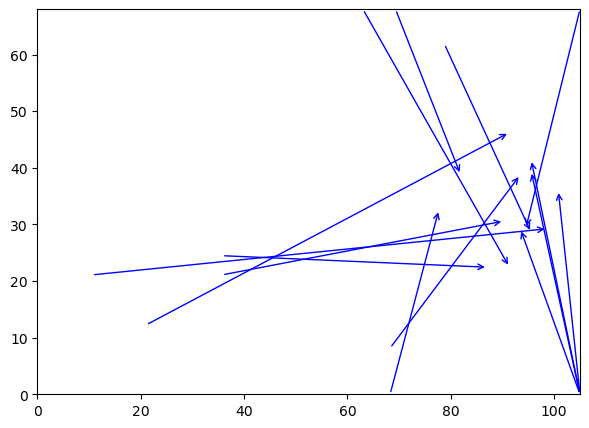

In [268]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlim([0,105])
ax.set_ylim([0,68])
for i in range(len(Legia_shot)):
    
    ax.annotate("", xy = (Legia_shot.iloc[i]['possession_endLocation_x'], Legia_shot.iloc[i]['possession_endLocation_y']),
               xytext = (Legia_shot.iloc[i]['possession_startLocation_x'], Legia_shot.iloc[i]['possession_startLocation_y']),
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
plt.show()

In [269]:
def shot_map(data, team_name, matchId):
    shot_data = data[(data['type_primary'] == "shot") & (data['team_name'] == team_name) & (data['matchId'] == matchId)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(shot_data)):
        color = "green" if shot_data.iloc[i]['shot_isGoal'] == 1 else "red"
        ax.annotate("", xy = (shot_data.iloc[i]['possession_endLocation_x'], shot_data.iloc[i]['possession_endLocation_y']),
               xytext = (shot_data.iloc[i]['possession_startLocation_x'], shot_data.iloc[i]['possession_startLocation_y']),
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    
    plt.ylim(0, 68) # need this, otherwise kde plot will go outside
    plt.xlim(0, 105)
    plt.show()

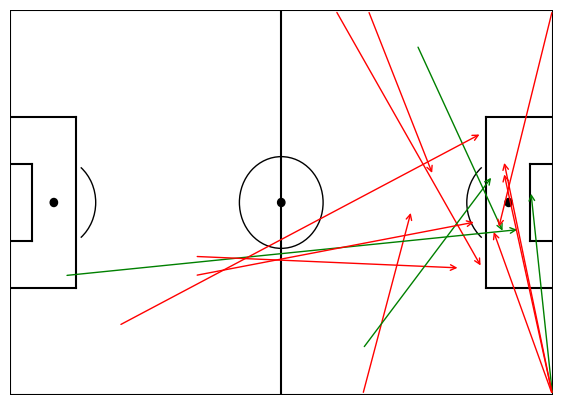

In [270]:
shot_map(df, 'Legia Warszawa', 5233074)

In [271]:
df.head()

,id,matchId,matchPeriod,minute,second,relatedEventId,SeasonID,SeasonName,MatchName,MatchDateUTC,...,success_flg,match_second,xT,teamgoal_prob,oppgoal_prob,teamgoal_prob_after_action,oppgoal_prob_after_action,next_play_state,direct_teamgoal_prob,direct_oppgoal_prob
0,1147241248,5233074,1H,0,3,1.147241e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,3,-0.002043,0.007776,0.001613,0.005733,0.002252,05_06_open_team,0.0,0.0
1,1147241249,5233074,1H,0,5,1.147241e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,5,0.000726,0.005733,0.002252,0.006460,0.002348,06_01_open_team,0.0,0.0
2,1147241250,5233074,1H,0,7,1.147241e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,7,0.002326,0.006460,0.002348,0.008786,0.001674,08_01_open_team,0.0,0.0
3,1147241251,5233074,1H,0,9,1.147241e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,9,0.016996,0.008786,0.001674,0.025782,0.001620,14_00_open_team,0.0,0.0
4,1147241253,5233074,1H,0,13,1.147241e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,False,13,-0.020695,0.025782,0.001620,0.005086,0.003767,12_01_open_opp,0.0,0.0


In [272]:
df.shape

(510021, 95)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510021 entries, 0 to 510020
Data columns (total 95 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                510021 non-null  int64  
 1   matchId                           510021 non-null  int64  
 2   matchPeriod                       510021 non-null  object 
 3   minute                            510021 non-null  int64  
 4   second                            510021 non-null  int64  
 5   relatedEventId                    496718 non-null  float64
 6   SeasonID                          510021 non-null  int64  
 7   SeasonName                        510021 non-null  object 
 8   MatchName                         510021 non-null  object 
 9   MatchDateUTC                      510021 non-null  object 
 10  location_x                        510021 non-null  float64
 11  location_y                        510021 non-null  f

In [274]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,510021.0,9.083717e+08,1.532091e+08,6.521731e+08,7.675815e+08,8.941263e+08,1.043913e+09,1.155613e+09
matchId,510021.0,5.178769e+06,4.577298e+04,5.140114e+06,5.140216e+06,5.140319e+06,5.233121e+06,5.233223e+06
minute,510021.0,4.549632e+01,2.722262e+01,0.000000e+00,2.200000e+01,4.500000e+01,6.900000e+01,1.070000e+02
second,510021.0,2.939954e+01,1.731288e+01,0.000000e+00,1.400000e+01,2.900000e+01,4.400000e+01,5.900000e+01
relatedEventId,496718.0,9.084078e+08,1.531917e+08,6.521731e+08,7.675817e+08,8.949848e+08,1.043913e+09,1.155613e+09
SeasonID,510021.0,1.869395e+05,6.099453e+02,1.862150e+05,1.862150e+05,1.874530e+05,1.874530e+05,1.874530e+05
location_x,510021.0,5.242666e+01,2.585902e+01,0.000000e+00,3.255000e+01,5.145000e+01,7.245000e+01,1.050000e+02
location_y,510021.0,3.413177e+01,2.038835e+01,0.000000e+00,1.632000e+01,3.400000e+01,5.236000e+01,6.800000e+01
team_id,510021.0,1.352899e+04,3.192286e+01,1.350400e+04,1.351000e+04,1.352100e+04,1.354000e+04,1.371200e+04
opponentTeam_id,510021.0,1.352981e+04,3.042446e+01,1.350400e+04,1.351200e+04,1.352400e+04,1.354000e+04,1.371200e+04


In [275]:
df.describe(exclude='number').T

,count,unique,top,freq
matchPeriod,510021,2,1H,255665
SeasonName,510021,2,2020\/2021,298470
MatchName,510021,402,"Raków Częstochowa - Piast Gliwice, 1-0",2671
MatchDateUTC,510021,399,2021-05-16 15:30:00,9901
team_name,510021,19,Lech Poznań,35340
team_formation,510021,28,4-2-3-1,122600
opponentTeam_name,510021,19,Warta Poznań,33796
opponentTeam_formation,510021,28,4-2-3-1,113838
player_name,510021,672,B. Zech,3295
player_position,510021,28,LB,36702


In [276]:
df[["player_name", "pass_accurate"]].groupby(["player_name"]).sum().sort_values("pass_accurate", ascending=False)

,pass_accurate
player_name,
B. Zech,2316.0
D. Dąbrowski,2195.0
E. Janža,2128.0
B. Slisz,2081.0
A. Jędrzejczyk,1914.0
...,...
O. Wojciechowski,0.0
F. Gryglak,0.0
M. Vasil,0.0


In [277]:
df[["player_name","shot_xg","goal","shot_onTarget", "player_position"]].groupby(["player_name", "player_position"]).sum().sort_values("goal",ascending=False).head(15)

,,shot_xg,goal,shot_onTarget
player_name,player_position,,,
T. Pekhart,CF,23.007798,24,42.0
M. Ishak,CF,26.206603,22,48.0
Erik Expósito,CF,11.021284,18,38.0
Jesús Jiménez,CF,14.882537,16,40.0
J. Świerczok,CF,11.795039,15,36.0
Flávio Paixão,CF,12.733185,12,22.0
Ivi López,LWF,7.596463,12,33.0
V. Gutkovskis,CF,12.874644,12,25.0
L. Zwoliński,CF,11.653192,11,28.0


In [278]:
df[["team_name","shot_xg","goal"]].groupby(["team_name"]).sum().sort_values("goal",ascending=False).head(15)

,shot_xg,goal
team_name,,
Raków Częstochowa,87.530525,79
Lech Poznań,93.722076,75
Lechia Gdańsk,77.182772,68
Śląsk Wrocław,56.916214,66
Legia Warszawa,79.980563,66
Pogoń Szczecin,82.126910,65
Wisła Płock,67.069902,64
Jagiellonia Białystok,67.378205,63
Piast Gliwice,74.349065,63


C:\Users\user\AppData\Local\Temp\ipykernel_11008\1886253345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues',annot=False)


<Axes: >

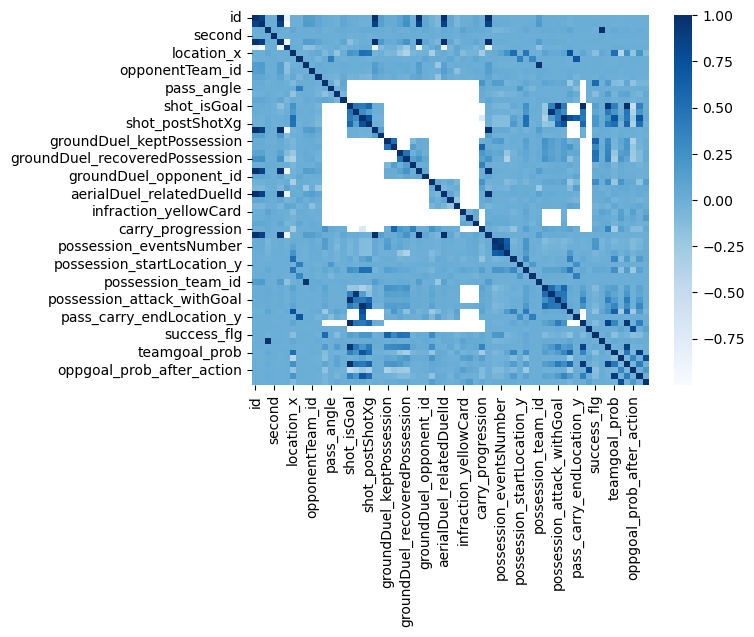

In [279]:
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

<Axes: xlabel='pass_length', ylabel='pass_angle'>

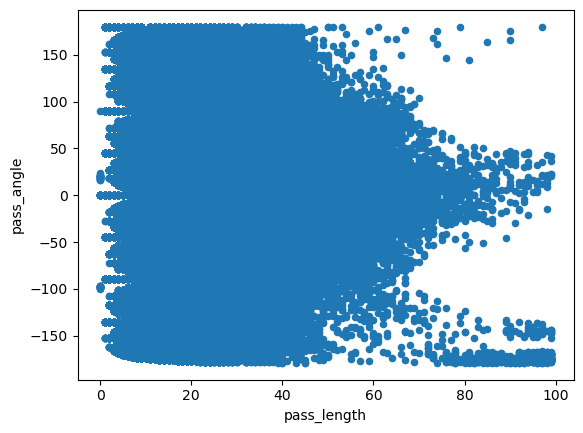

In [280]:
df[df['pass_length']<100].plot.scatter(x='pass_length', y='pass_angle')

<Axes: xlabel='pass_length', ylabel='pass_angle'>

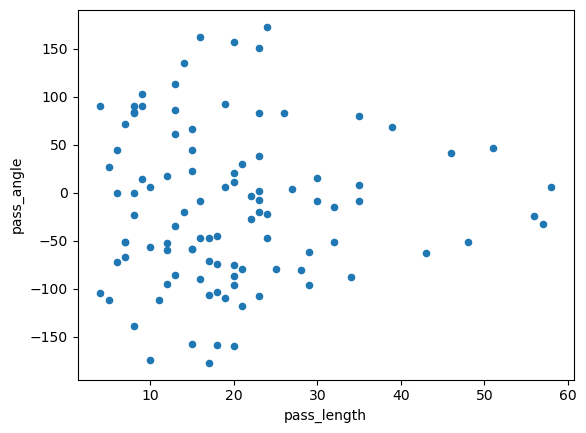

In [281]:
df[df['pass_length']<100].sample(100).plot.scatter(x='pass_length', y='pass_angle')

<Axes: xlabel='xT', ylabel='shot_xg'>

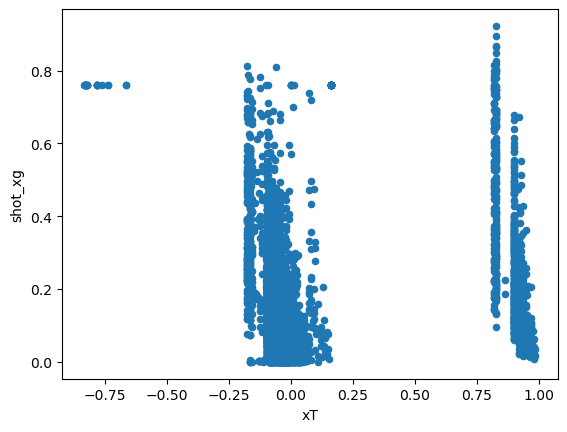

In [282]:
df[df['shot_xg']<1000].plot.scatter(x='xT', y='shot_xg')

In [283]:
first_half=df[(df['matchPeriod']== '1H') & (df['matchId']== 5233074)]
second_half=df[(df['matchPeriod']== '2H') & (df['matchId']== 5233074)]
second_half.head()

,id,matchId,matchPeriod,minute,second,relatedEventId,SeasonID,SeasonName,MatchName,MatchDateUTC,...,success_flg,match_second,xT,teamgoal_prob,oppgoal_prob,teamgoal_prob_after_action,oppgoal_prob_after_action,next_play_state,direct_teamgoal_prob,direct_oppgoal_prob
645,1147242189,5233074,2H,45,3,1.147242e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,2703,-0.003000,0.007953,0.001631,0.004953,0.002827,04_05_open_team,0.0,0.0
646,1147242190,5233074,2H,45,4,1.147242e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,2704,0.001768,0.004953,0.002827,0.006721,0.001950,06_08_open_team,0.0,0.0
647,1147242191,5233074,2H,45,6,1.147242e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,2706,0.003527,0.006721,0.001950,0.010249,0.001523,09_10_open_team,0.0,0.0
648,1147242192,5233074,2H,45,8,1.147242e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,2708,0.001423,0.010249,0.001523,0.011672,0.001471,10_11_open_team,0.0,0.0
649,1147242194,5233074,2H,45,9,1.147242e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,2709,-0.006786,0.011672,0.001471,0.004886,0.003293,05_11_open_team,0.0,0.0


In [284]:
pass_raw=first_half[df.type_primary == 'pass']
pass_raw.head()

,id,matchId,matchPeriod,minute,second,relatedEventId,SeasonID,SeasonName,MatchName,MatchDateUTC,...,success_flg,match_second,xT,teamgoal_prob,oppgoal_prob,teamgoal_prob_after_action,oppgoal_prob_after_action,next_play_state,direct_teamgoal_prob,direct_oppgoal_prob
0,1147241248,5233074,1H,0,3,1.147241e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,3,-0.002043,0.007776,0.001613,0.005733,0.002252,05_06_open_team,0.000000,0.0
1,1147241249,5233074,1H,0,5,1.147241e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,5,0.000726,0.005733,0.002252,0.006460,0.002348,06_01_open_team,0.000000,0.0
3,1147241251,5233074,1H,0,9,1.147241e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,9,0.016996,0.008786,0.001674,0.025782,0.001620,14_00_open_team,0.000000,0.0
7,1147241256,5233074,1H,0,20,1.147241e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,20,0.003178,0.018314,0.001507,0.021492,0.001509,12_01_open_team,0.000122,0.0
8,1147241257,5233074,1H,0,22,1.147241e+09,186215,2021\/2022,"Legia Warszawa - Zagłębie Lubin, 4-0",2021-12-15 19:30:00,...,True,22,0.003546,0.021492,0.001509,0.025038,0.001601,13_01_open_team,0.000066,0.0


In [285]:
pass_number_raw=pass_raw[['player_name', 'pass_recipient_name', 'matchPeriod']]
pass_number_raw.head()

,player_name,pass_recipient_name,matchPeriod
0,S. Živec,J. Żubrowski,1H
1,J. Żubrowski,K. Chodyna,1H
3,K. Chodyna,P. Szysz,1H
7,J. Żubrowski,K. Chodyna,1H
8,K. Chodyna,P. Szysz,1H


In [286]:
pass_number_raw['pair']=pass_number_raw.player_name + pass_number_raw.pass_recipient_name
pass_number_raw.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11008\1583119581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_number_raw['pair']=pass_number_raw.player_name + pass_number_raw.pass_recipient_name


,player_name,pass_recipient_name,matchPeriod,pair
0,S. Živec,J. Żubrowski,1H,S. ŽivecJ. Żubrowski
1,J. Żubrowski,K. Chodyna,1H,J. ŻubrowskiK. Chodyna
3,K. Chodyna,P. Szysz,1H,K. ChodynaP. Szysz
7,J. Żubrowski,K. Chodyna,1H,J. ŻubrowskiK. Chodyna
8,K. Chodyna,P. Szysz,1H,K. ChodynaP. Szysz


In [287]:
pass_count = pass_number_raw.groupby(['pair']).count().reset_index()
pass_count = pass_count[['pair', 'matchPeriod']]
pass_count.columns = ['pair', 'number_pass']
pass_count.head()

,pair,number_pass
0,A. BorucB. Slisz,1
1,A. BorucJ. Żubrowski,1
2,A. BorucJosué,1
3,A. BorucM. Hołownia,2
4,A. BorucM. Wieteska,1


In [288]:
avg_loc_df = pass_raw[['team_name', 'player_name', 'location_x', 'location_y']]
avg_loc_df.head()

,team_name,player_name,location_x,location_y
0,Zagłębie Lubin,S. Živec,51.45,32.64
1,Zagłębie Lubin,J. Żubrowski,33.60,35.36
3,Zagłębie Lubin,K. Chodyna,53.55,9.52
7,Zagłębie Lubin,J. Żubrowski,73.50,12.92
8,Zagłębie Lubin,K. Chodyna,82.95,7.48


In [289]:
avg_loc_df = avg_loc_df.groupby(['team_name','player_name']).agg({'location_x': np.mean, 'location_y': np.mean}).reset_index()
avg_loc_df.head()

,team_name,player_name,location_x,location_y
0,Legia Warszawa,A. Boruc,9.450000,29.495000
1,Legia Warszawa,B. Ciepiela,69.855882,31.640000
2,Legia Warszawa,B. Slisz,57.225000,17.680000
3,Legia Warszawa,Josué,52.796154,40.834872
4,Legia Warszawa,M. Hołownia,53.000000,48.895238


In [290]:
pass_merge = pass_number_raw.merge(pass_count, on='pair')
pass_merge = pass_merge[['player_name', 'pass_recipient_name', 'number_pass']]
pass_merge = pass_merge.drop_duplicates()
pass_merge.head()

,player_name,pass_recipient_name,number_pass
0,S. Živec,J. Żubrowski,3
3,J. Żubrowski,K. Chodyna,3
6,K. Chodyna,P. Szysz,3
9,P. Szysz,L. Łakomy,2
11,L. Łakomy,A. Ratajczyk,3


In [291]:
avg_loc_df = avg_loc_df[['player_name', 'location_x','location_y']]

pass_cleaned = pass_merge.merge(avg_loc_df, on='player_name')
pass_cleaned.rename({'location_x': 'pass_carry_endLocation_x', 'location_y': 'pass_carry_endLocation_y'}, axis='columns', inplace=True)

pass_cleaned = pass_cleaned.merge(avg_loc_df, left_on='pass_recipient_name', right_on='player_name', suffixes=['', '_end'])
pass_cleaned.rename({'location_x': 'location_x', 'location_y': 'location_y'}, axis='columns', inplace=True)

pass_cleaned = pass_cleaned.drop(['player_name_end'], axis=1)
pass_cleaned.head()

,player_name,pass_recipient_name,number_pass,pass_carry_endLocation_x,pass_carry_endLocation_y,location_x,location_y
0,S. Živec,J. Żubrowski,3,60.709091,40.490909,57.5925,42.058
1,K. Chodyna,J. Żubrowski,1,55.207895,14.566316,57.5925,42.058
2,P. Szysz,J. Żubrowski,1,68.550000,20.400000,57.5925,42.058
3,L. Łakomy,J. Żubrowski,1,51.225000,45.584286,57.5925,42.058
4,A. Ratajczyk,J. Żubrowski,4,63.378000,58.996800,57.5925,42.058


In [292]:
legia_player_df = df[df.team_name == 'Legia Warszawa'].groupby('player_name').agg({'minute': [min, max]}).reset_index()
legia_player_df = pd.concat([legia_player_df['player_name'], legia_player_df['minute']], axis=1)
legia_player_df['minutes_played'] = legia_player_df['max'] - legia_player_df['min']
legia_player_df = legia_player_df.sort_values('minutes_played', ascending=False)
legia_player_df

,player_name,min,max,minutes_played
22,K. Skibicki,0,99,99
0,A. Boruc,0,98,98
20,Josué,0,98,98
36,M. Wieteska,0,98,98
47,Yuri Ribeiro,0,98,98
26,Luquinhas,0,97,97
44,T. Pekhart,0,97,97
1,A. Jędrzejczyk,0,97,97
6,B. Slisz,0,97,97
30,M. Hołownia,0,97,97


In [293]:
legia_player_names = legia_player_df.player_name[:11].tolist()

pass_legia = pass_cleaned[pass_cleaned.player_name.isin(legia_player_names)]
pass_legia = pass_legia[pass_legia.pass_recipient_name.isin(legia_player_names)]

print(pass_legia.shape)
pass_legia.head()

(26, 7)


,player_name,pass_recipient_name,number_pass,pass_carry_endLocation_x,pass_carry_endLocation_y,location_x,location_y
71,Josué,M. Wieteska,4,52.796154,40.834872,40.406897,31.022069
74,M. Hołownia,M. Wieteska,7,53.000000,48.895238,40.406897,31.022069
76,A. Boruc,M. Wieteska,1,9.450000,29.495000,40.406897,31.022069
80,Josué,A. Boruc,1,52.796154,40.834872,9.450000,29.495000
81,M. Hołownia,A. Boruc,1,53.000000,48.895238,9.450000,29.495000


In [294]:
pass_legia['width'] = pass_legia['number_pass'] / pass_legia['number_pass'].max()
pass_legia.head()

,player_name,pass_recipient_name,number_pass,pass_carry_endLocation_x,pass_carry_endLocation_y,location_x,location_y,width
71,Josué,M. Wieteska,4,52.796154,40.834872,40.406897,31.022069,0.571429
74,M. Hołownia,M. Wieteska,7,53.000000,48.895238,40.406897,31.022069,1.000000
76,A. Boruc,M. Wieteska,1,9.450000,29.495000,40.406897,31.022069,0.142857
80,Josué,A. Boruc,1,52.796154,40.834872,9.450000,29.495000,0.142857
81,M. Hołownia,A. Boruc,1,53.000000,48.895238,9.450000,29.495000,0.142857


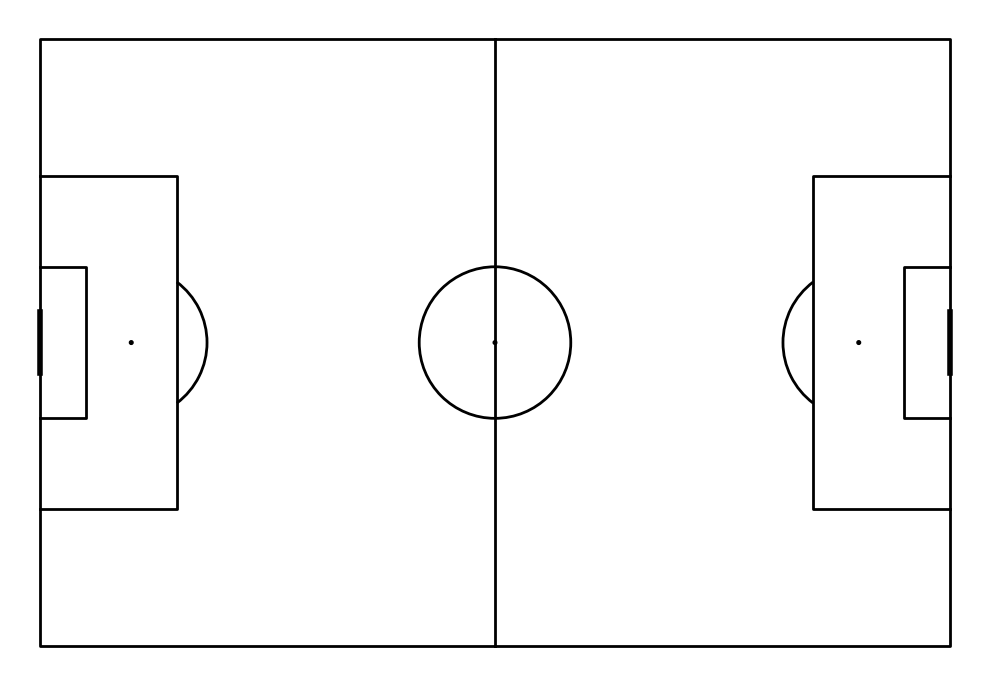

In [295]:
from mplsoccer import Pitch
pitch=Pitch(line_color='black')
fig, ax =pitch.draw(figsize=(10,7))

pitchLengthX=114.8
pitchWidth=74.4

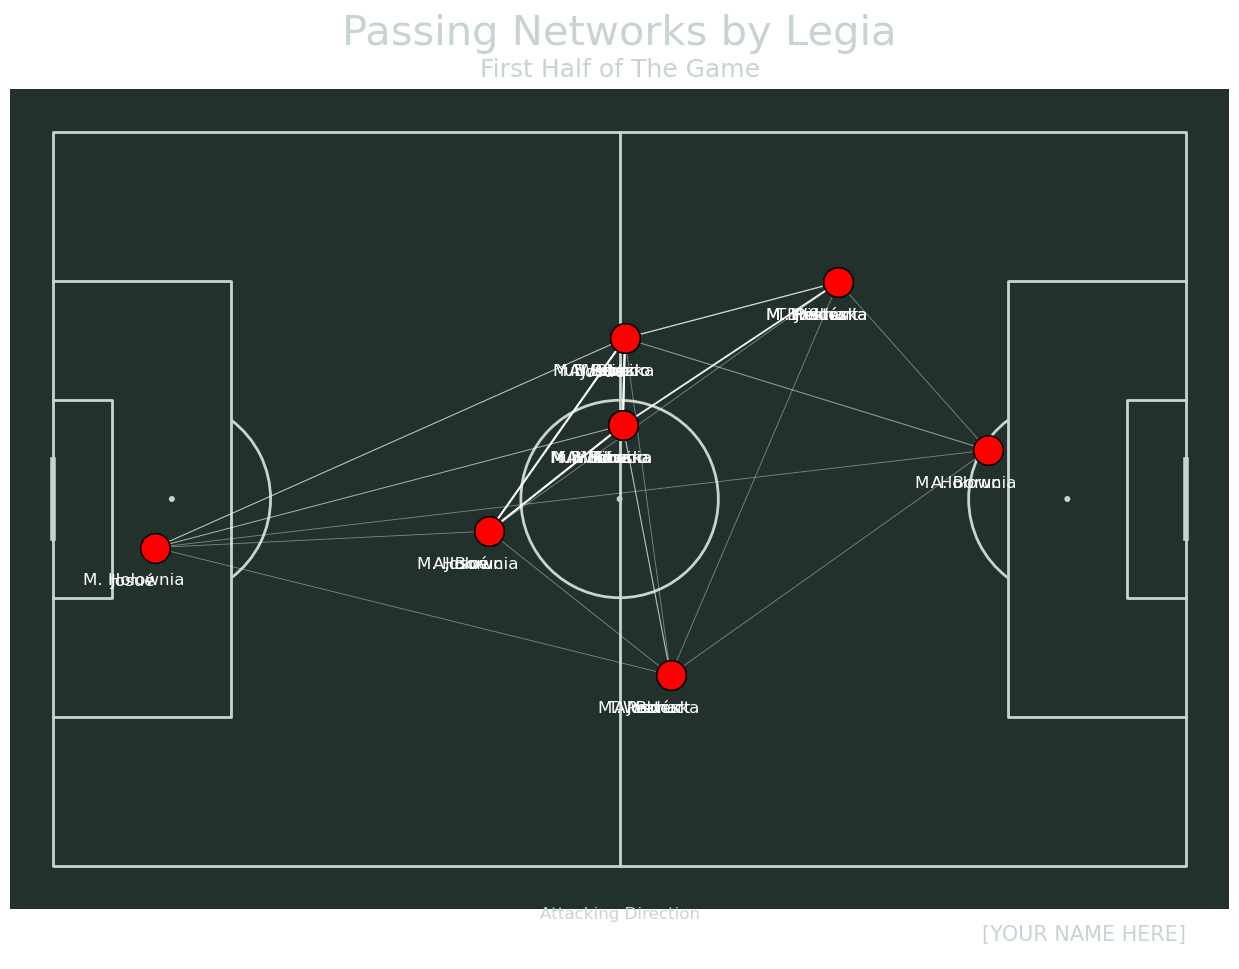

In [296]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.colors import to_rgba


MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(pass_legia), 1))
c_transparency = pass_legia.number_pass / pass_legia.number_pass.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

pitch = Pitch(pitch_type='uefa', pitch_color='#22312b', line_color='#c7d5cc')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False, 
                      title_space=0, grid_height=0.82, endnote_height=0.05)

pass_lines = pitch.lines(pass_legia.location_x, pass_legia.location_y,
                         pass_legia.pass_carry_endLocation_x, pass_legia.pass_carry_endLocation_y, lw=pass_legia.width+0.5,
                         color=color, zorder=1, ax=axs['pitch'])

pass_nodes = pitch.scatter(pass_legia.location_x, pass_legia.location_y, s=450,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=axs['pitch'])

for index, row in pass_legia.iterrows():
    pitch.annotate(row.player_name, xy=(row.location_x-2, row.location_y-3), c='white', va='center',
                   ha='center', size=12, ax=axs['pitch'])
    
# endnote /title
axs['endnote'].text(1, 0.5, '[YOUR NAME HERE]', color='#c7d5cc',
                    va='center', ha='right', fontsize=15)

axs['endnote'].text(0.5, 0.9, 'Attacking Direction', va='center', ha='center', color='#c7d5cc', fontsize=12)
axs['endnote'].arrow(0.4, 0.6, 0.2, 0, head_width=0.25, head_length=0.025, ec='w', fc='w')
axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)

axs['title'].text(0.5, 0.7, 'Passing Networks by Legia', color='#c7d5cc',
                  va='center', ha='center', fontsize=30)
axs['title'].text(0.5, 0.25, 'First Half of The Game', color='#c7d5cc',
                  va='center', ha='center', fontsize=18)
plt.savefig('Passing Networks.png', dpi=300, bbox_inches='tight')
plt.show()

In [297]:
# Retrieve rows that record shots
shots = df[(df["type_primary"] == "shot") & (df['player_name']=='T. Pekhart')]
shots1 = df[(df["type_primary"] == "shot") & (df['player_name']=='M. Ishak')]
shots2 = df[(df["type_primary"] == "shot") & (df['player_name']=='Erik Expósito')]
shots3 = df[(df["type_primary"] == "shot") & (df['player_name']=='Jesús Jiménez')]
# Filter the data that record AC Milan
#shots = shots[shots.team_name == 'Legia Warszawa']
# Select the columns
shots = shots[['team_name', 'player_name', 'minute', 'second', 'location_x', 'location_y', 'shot_xg', 'shot_isGoal']]
shots1 = shots1[['team_name', 'player_name', 'minute', 'second', 'location_x', 'location_y', 'shot_xg', 'shot_isGoal']]
shots2 = shots2[['team_name', 'player_name', 'minute', 'second', 'location_x', 'location_y', 'shot_xg', 'shot_isGoal']]
shots3 = shots3[['team_name', 'player_name', 'minute', 'second', 'location_x', 'location_y', 'shot_xg', 'shot_isGoal']]
# Because the location data is on list format (ex: [100, 80]), we extract the x and y coordinate using apply method.
shots['x'] = shots[['location_x']]
shots['y'] = shots[['location_y']]
shots1['x'] = shots1[['location_x']]
shots1['y'] = shots1[['location_y']]
shots2['x'] = shots2[['location_x']]
shots2['y'] = shots2[['location_y']]
shots3['x'] = shots3[['location_x']]
shots3['y'] = shots3[['location_y']]
#shots = shots.drop('location_x', 'location_y', axis=2)
# Divide the dataset based on the outcome
goals = shots[shots.shot_isGoal == 1.0]
shots = shots[shots.shot_isGoal == 0.0]
goals1 = shots1[shots1.shot_isGoal == 1.0]
shots1 = shots1[shots1.shot_isGoal == 0.0]
goals2 = shots2[shots2.shot_isGoal == 1.0]
shots2 = shots2[shots2.shot_isGoal == 0.0]
goals3 = shots3[shots3.shot_isGoal == 1.0]
shots3 = shots3[shots3.shot_isGoal == 0.0]
shots3.head()

,team_name,player_name,minute,second,location_x,location_y,shot_xg,shot_isGoal,x,y
13487,Górnik Zabrze,Jesús Jiménez,75,29,98.70,44.20,0.38710,0.0,98.70,44.20
28843,Górnik Zabrze,Jesús Jiménez,11,30,91.35,41.48,0.11470,0.0,91.35,41.48
48921,Górnik Zabrze,Jesús Jiménez,13,55,94.50,44.88,0.04288,0.0,94.50,44.88
49181,Górnik Zabrze,Jesús Jiménez,31,15,93.45,43.52,0.14950,0.0,93.45,43.52
49760,Górnik Zabrze,Jesús Jiménez,70,10,90.30,43.52,0.08445,0.0,90.30,43.52


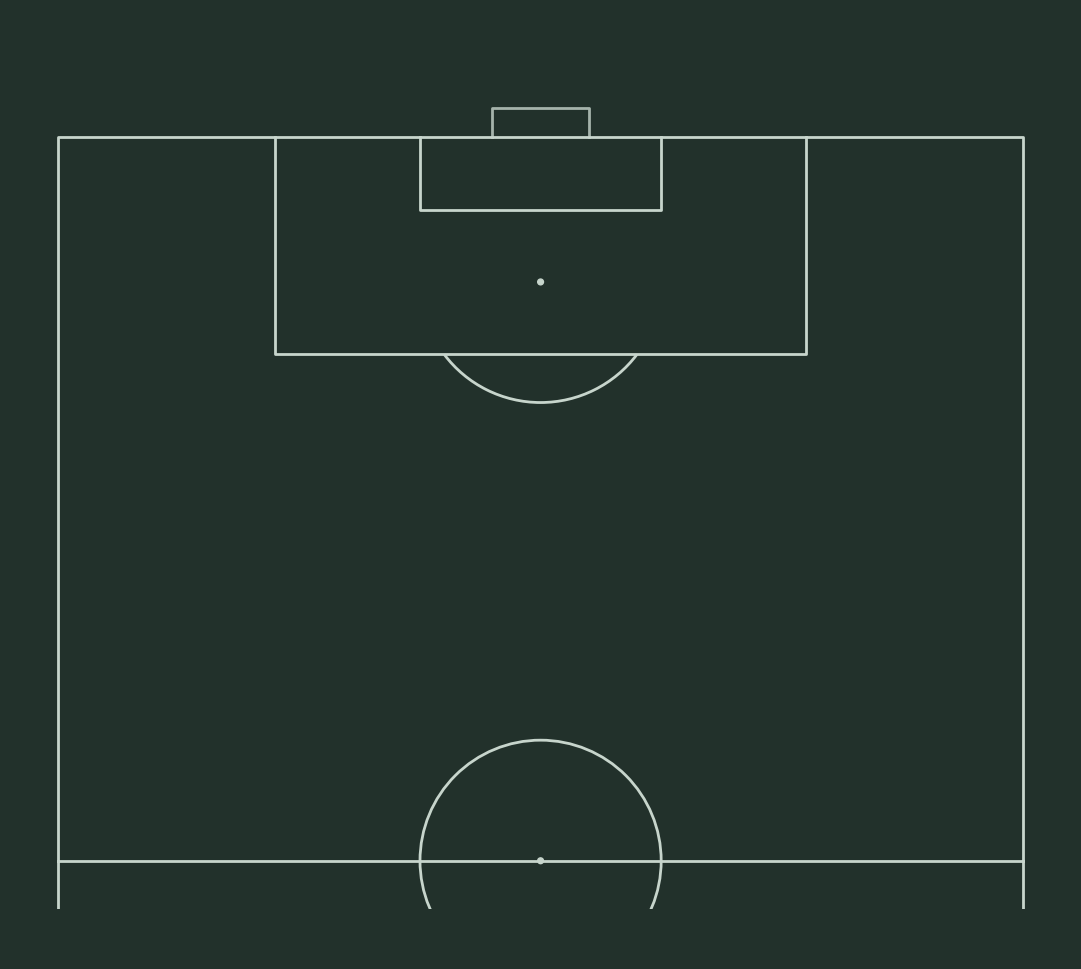

In [298]:
from mplsoccer import VerticalPitch
pitch = VerticalPitch(pitch_type='statsbomb', half=True, goal_type='box', goal_alpha=0.8, pitch_color='#22312b', line_color='#c7d5cc')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False,title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor("#22312b")

In [299]:
scatter_shots = pitch.scatter(shots.x, shots.y, s=(shots.shot_xg * 900) + 100, c='red', edgecolors='black', marker='o', ax=axs['pitch'])
scatter_goals = pitch.scatter(goals.x, goals.y, s=(goals.shot_xg * 900) + 100, c='red', edgecolors='black', marker='*', ax=axs['pitch'])

In [300]:
axs['endnote'].text(0.85, 0.5, '[YOUR NAME]', color='#c7d5cc', va='center', ha='center', fontsize=15)
axs['title'].text(0.5, 0.7, 'The Shots Map from Legi', color='#c7d5cc', va='center', ha='center', fontsize=30)
axs['title'].text(0.5, 0.25, 'The Game\'s First Half', color='#c7d5cc', va='center', ha='center', fontsize=18)

Text(0.5, 0.25, "The Game's First Half")

In [301]:
pitch.arrows(70, 5, 100, 5, ax=axs['pitch'], color='#c7d5cc')

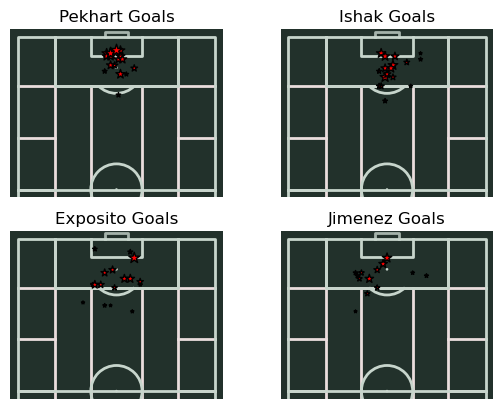

In [302]:
from mplsoccer import VerticalPitch
pitch = VerticalPitch(pitch_type='wyscout', half=True, goal_type='box', goal_alpha=0.8, pitch_color='#22312b', line_color='#c7d5cc')
#fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False, title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor("#22312b")
fig, axs=plt.subplots(2,2)
pitch=VerticalPitch(pitch_type='wyscout', positional=True, half=True, goal_type='box', goal_alpha=0.8, pitch_color='#22312b', line_color='#c7d5cc')
pitch.draw(axs[0,0])
pitch.draw(axs[0,1])
pitch.draw(axs[1,0])
pitch.draw(axs[1,1])
axs[0,0].set_title("Pekhart Goals")
axs[0,1].set_title("Ishak Goals")
axs[1,0].set_title("Exposito Goals")
axs[1,1].set_title("Jimenez Goals")
#scatter_shots = pitch.scatter(shots.x * 0.93, 100-shots.y * 1.47, s=(shots.shot_xg * 100 ) , c='red', edgecolors='black', marker='o', ax=axs['pitch'])
scatter_goals = pitch.scatter(goals.x * 0.93, 100-goals.y * 1.47, s=(goals.shot_xg * 100 ) , c='red', edgecolors='black', marker='*', ax=axs[0,0])
scatter_goals1 = pitch.scatter(goals1.x * 0.93, 100-goals1.y * 1.47, s=(goals1.shot_xg * 100 ) , c='red', edgecolors='black', marker='*', ax=axs[0,1])
scatter_goals2 = pitch.scatter(goals2.x * 0.93, 100-goals2.y * 1.47, s=(goals2.shot_xg * 100 ) , c='red', edgecolors='black', marker='*', ax=axs[1,0])
scatter_goals3 = pitch.scatter(goals3.x * 0.93, 100-goals3.y * 1.47, s=(goals3.shot_xg * 100 ) , c='red', edgecolors='black', marker='*', ax=axs[1,1])
#axs['endnote'].text(0.85, 0.5, '[YOUR NAME]', color='#c7d5cc', va='center', ha='center', fontsize=15)
#axs['title'].text(0.5, 0.7, 'The Shots Map from T. Pekhart', color='#c7d5cc', va='center', ha='center', fontsize=30)
plt.show() # used this image as figure 2 and altered the code for figure 3, 4 and 5

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U12'), dtype('int32')) -> None

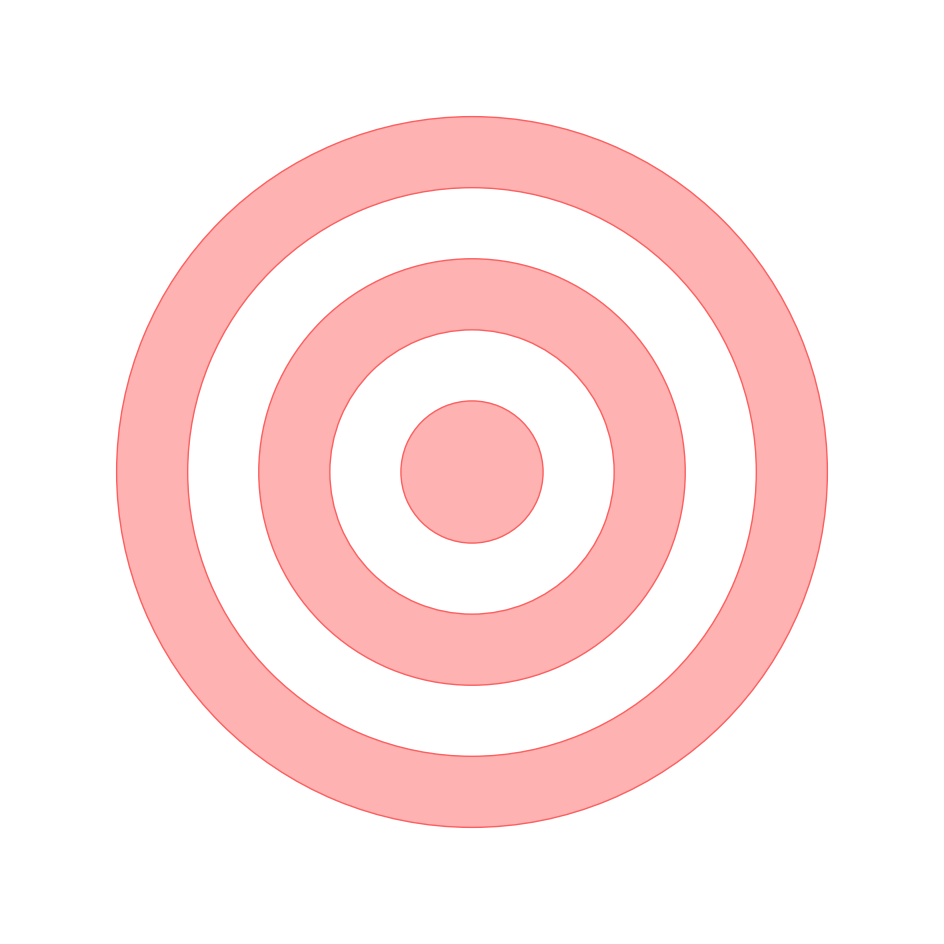

In [303]:
from mplsoccer import Radar
import matplotlib.pyplot as plt

Pekhart_pass = df[(df["type_primary"] == "pass") & (df['player_name']=='T. Pekhart')]
Pekhart_shot= df[(df["type_primary"] == "shot") & (df['player_name']=='T. Pekhart')]

#Pekhart_goals= Pekhart_shot[shots.shot_isGoal == 1.0]

radar = Radar(params=['Pekhart_pass', 'Pekhart_shot', 'cica'], min_range=[0, 0, 0], max_range=[3000, 100, 10])
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')
values = ['Pekhart_pass', 'Pekhart_shot', 3]
radar_poly, rings, vertices = radar.draw_radar(values, ax=ax,
                                               kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6}, 
                                               kwargs_rings={'facecolor': '#d80499', 'alpha': 0.6})
range_labels = radar.draw_range_labels(ax=ax)
param_labels = radar.draw_param_labels(ax=ax)
plt.show()

In [ ]:
df_group = df.groupby(['player_name', 'matchId']).agg(
    minutes_played=('minute', lambda x: x.max() - x.min())
)

In [ ]:
df_group.reset_index(inplace=True)

In [ ]:
df = pd.merge(df, df_group[['player_name', 'matchId', 'minutes_played']], on=['player_name', 'matchId'], how='left')

In [ ]:
df['minutes_played'] = df.groupby(['player_name', 'matchId'])['minute'].transform(lambda x: x.max() - x.min())


In [ ]:
df[["player_name","shot_xg","goal","shot_onTarget", "player_position", "minutes_played"]].groupby(["player_name", "player_position"]).sum().sort_values("goal",ascending=False).head(15)

In [ ]:
df_group=df.groupby(['player_name', 'matchId']).agg(
min= ('minute', 'min'),
max = ('minute', 'max'))

In [ ]:
df_group['minutes_played']=df_group['max']-df_group['min']

In [ ]:
df_group.reset_index(inplace=True)

In [ ]:
df=pd.merge(df, df_group[['player_name', 'minutes_played']], on='player_name')